# Tarea 6 - Programació de Inteligencia Artificial
# AIoT

### Realizad las siguientes actividades sobre el ejemplo de convergencia AI + IoT de los apuntes.

## Código base de ejemplo:

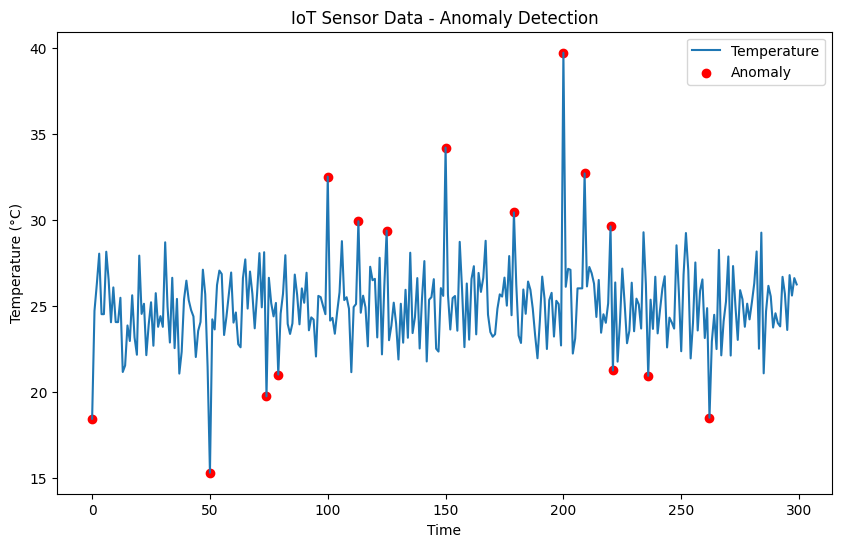

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Simulate IoT Sensor Data
def simulate_sensor_data(samples=300):
    np.random.seed(42)
    temperature = np.random.normal(25, 2, samples)  # Normal temperatures around 25°C
    # Introduce anomalies (very high or low temperatures)
    temperature[::50] = np.random.uniform(10, 40, samples // 50)
    return pd.DataFrame({'temperature': temperature})

# Step 2: Detect Anomalies using Isolation Forest
def detect_anomalies(data):
    model = IsolationForest(contamination=0.05, random_state=42)
    data['anomaly'] = model.fit_predict(data[['temperature']])
    return data

# Step 3: Visualize Sensor Data and Anomalies
def plot_anomalies(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['temperature'], label='Temperature')

    # Mark anomalies in red
    anomalies = data[data['anomaly'] == -1]
    plt.scatter(anomalies.index, anomalies['temperature'], color='red', label='Anomaly')

    plt.title('IoT Sensor Data - Anomaly Detection')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.show()

# Ejecutar el código
sensor_data = simulate_sensor_data(300)
analyzed_data = detect_anomalies(sensor_data)
plot_anomalies(analyzed_data)

## 1) Fijad la temperatura media en 20 grados.

## 2) Duplicad la amplitud de las temperaturas anómalas.

## 3) Cambiad la medida de la muestra a 500 valores.

## 4) Experimentad con los diferentes valores del parámetro "contamination". ¿Cuál es su efecto?

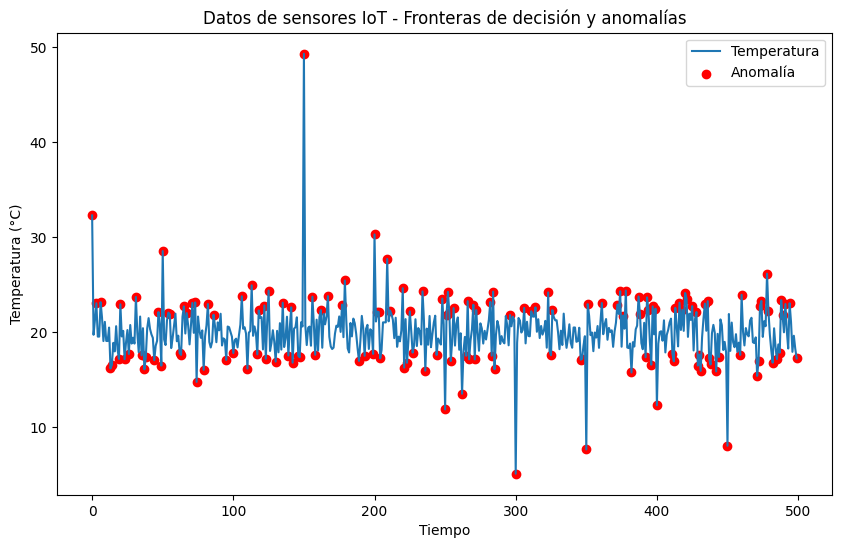

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Simulate IoT Sensor Data
def simulate_sensor_data(samples=500):  ### 3) MODIFICAMOS EL NÚMERO DE SAMPLES A 500
    np.random.seed(42)
    temperature = np.random.normal(20, 2, samples)  ### 1) MODIFICAMOS LA TEMPERATURA MEDIA A 20 GRADOS
    # Introduce anomalies (very high or low temperatures)
    temperature[::50] = np.random.uniform(0, 50, samples // 50) ### 2) DUPLICAMOS LA AMPLITUD DE LAS ANOMALÍAS
    return pd.DataFrame({'temperature': temperature})

# Step 2: Detect Anomalies using Isolation Forest
def detect_anomalies(data):
    model = IsolationForest(contamination=0.3, random_state=42) ### 4) DEFINIMOS EL PARÁMETRO 'contamination' a 0.3 para experimentar
    data['anomaly'] = model.fit_predict(data[['temperature']])
    return data

# Step 3: Visualize Sensor Data and Anomalies
def plot_anomalies(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['temperature'], label='Temperatura')

    # Mark anomalies in red
    anomalies = data[data['anomaly'] == -1]
    plt.scatter(anomalies.index, anomalies['temperature'], color='red', label='Anomalía')

    plt.title('Datos de sensores IoT - Fronteras de decisión y anomalías')
    plt.xlabel('Tiempo')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.show()

# Ejecutar el código
sensor_data = simulate_sensor_data(500) ### 3) MODIFICAMOS EL NÚMERO DE SAMPLES A 500
analyzed_data = detect_anomalies(sensor_data)
plot_anomalies(analyzed_data)

Podemos ver que las anomalías han aumentado, esto se debe a que el parámetro "contamination" determina el porcentaje de anomalías que habrá en los datos.

Al pasa de 0.05 (5%) a 0.3 (30%) claramente vemos representado en el gráfico que ya no se trata de un 5% de anomalías sino del 30%. De hecho, haciendo pruebas he definido el parámetro a 1 y he conseguido este error:  
* **InvalidParameterError:** *The 'contamination' parameter of IsolationForest must be a str among {'auto'} or a float in the range (0.0, 0.5]. Got 1 instead.*

Es entonces cuando entendemos que el rango posible de valores va de 0.0 a 0.5

## 5) Añadid las fronteras de decisión del modelo. Os será útil el ejemplo de: https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html

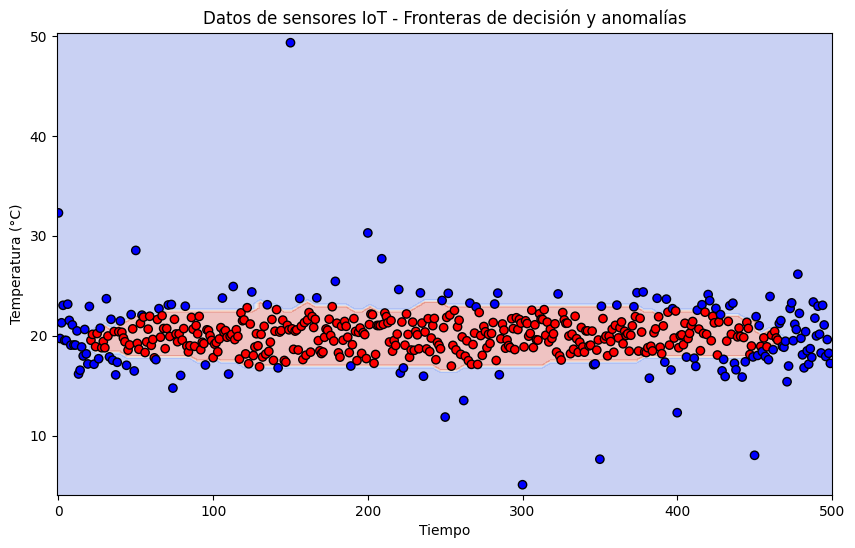

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

# Step 1: Simulate IoT Sensor Data
def simulate_sensor_data(samples=500): ## MODIFICAMOS EL NÚMERO DE SAMPLES A 500
    np.random.seed(42)
    temperature = np.random.normal(20, 2, samples) ## MODIFICAMOS LA TEMPERATURA MEDIA A 20 GRADOS
    temperature[::50] = np.random.uniform(0, 50, samples // 50) ## DUPLICAMOS LA AMPLITUD DE LAS ANOMALÍAS
    return pd.DataFrame({'time': np.arange(samples), 'temperature': temperature})  # 'time' como segunda dimensión

#  Step 2: Detect Anomalies using Isolation Forest
def detect_anomalies(data):
    model = IsolationForest(contamination=0.3, random_state=42) ## DEFINIMOS EL PARÁMETRO 'contamination' a 0.3
    data['anomaly'] = model.fit_predict(data[['time', 'temperature']])
    return data, model

#  Step 3: Visualize Sensor Data, Anomalies, and Decision Boundaries
def plot_anomalies(data, model):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Crear la frontera de decisión
    DecisionBoundaryDisplay.from_estimator(
        model, data[['time', 'temperature']], response_method="predict",
        grid_resolution=100, alpha=0.3, ax=ax, cmap='coolwarm'
    )

    # Graficar los datos con 'time' en X y 'temperature' en Y
    ax.scatter(data['time'], data['temperature'], c=data['anomaly'], cmap='bwr', edgecolors='k')

    ax.set_title('Datos de sensores IoT - Fronteras de decisión y anomalías')
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Temperatura (°C)')
    plt.show()

# Ejecutar el código
data = simulate_sensor_data(500) ## MODIFICAMOS EL NÚMERO DE SAMPLES A 500
data, model = detect_anomalies(data)
plot_anomalies(data, model)

## 6) Ejecutad el cuaderno sobre los datos reales de temperatura de algua de las fuentes disponibles en: https://thingspeak.mathworks.com/channels/public


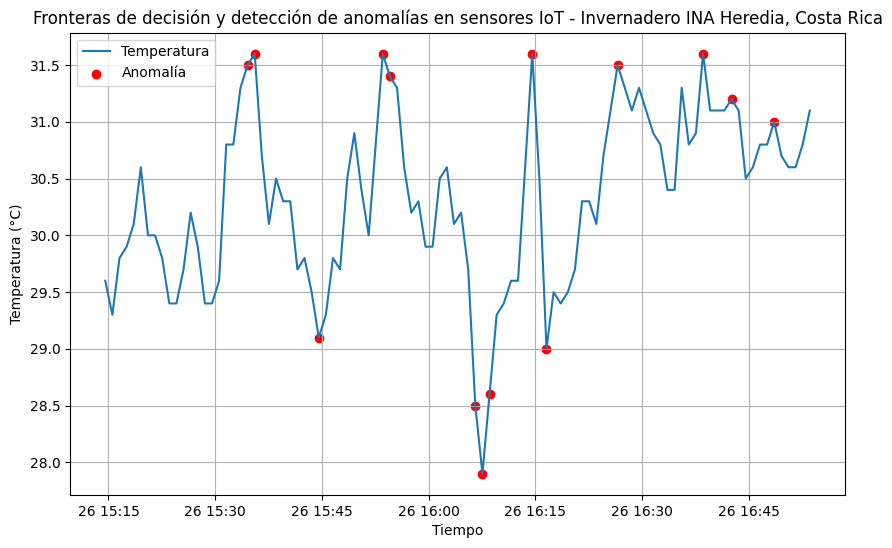

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

url = "https://thingspeak.mathworks.com/channels/2879732/field/1.csv"

# Step 1: Preparar los datos
def prepare_data(url):
    df = pd.read_csv(url)

    # Convertir field1 a numérico y eliminar NaN
    df['field1'] = pd.to_numeric(df['field1'], errors='coerce')
    df = df.dropna().reset_index(drop=True)

    # Usar created_at como índice de tiempo (lo convertimos a datetime)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df = df.set_index('created_at')

    # Renombrar field1 a "temperature"
    df.rename(columns={'field1': 'temperature'}, inplace=True)
    return df

# Step 2: Aplicar IsolationForest
def detect_anomalies(data):
    ## Definimos 'contamination' a 0.15 ya que los datos son distintos a los anteriore, y 0.3 era para mi gusto demasiado en este caso.
    model = IsolationForest(contamination=0.15, random_state=42)
    data['anomaly'] = model.fit_predict(data[['temperature']])
    return data

# Step 3: Visualizar los datos en el gráfico
def plot_anomalies(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['temperature'], label='Temperatura')

    # Marca las anomalías en rojo
    anomalies = data[data['anomaly'] == -1]
    plt.scatter(anomalies.index, anomalies['temperature'], color='red', label='Anomalía')

    plt.title('Fronteras de decisión y detección de anomalías en sensores IoT - Invernadero INA Heredia, Costa Rica')
    plt.xlabel('Tiempo')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar el código
sensor_data = prepare_data(url)
analyzed_data = detect_anomalies(sensor_data)
plot_anomalies(analyzed_data)

Al empezar con este último apartado usé un dataset que no tenía mucha variación de temperatura en sus datos, esto provocaba un resultado gráfico no muy esperado, ya que la línea que se creaba era ascendente pero muy lineal, sin saltos de temperatura. Esto no era un error pero he decidido cambiar el dataset para poder ver mejor las anomalías.

Una vez conseguido el dataset que me ha convencido más he trabajado en formatear bien los datos necesarios, en concreto la columna "field1" y "created_at". El código restante es muy parecido al usado en los anteriores apartados por lo que la dificultad estaba en tratar bien los datos al principio.